# Homework 1. Foraging strategies

## A work by Alexandre Justo Miró, on 07 oct 2018

Import libraries.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
%config  InlineBackend.figure_format="svg"

Create function nnPBC. It will be responsible for calculating the 4 nearest neighbors of a given point. Since periodic boundary conditions are considered, it will always return a set of 4 points.

In [2]:
# Compute nearest neighbors of a given point in a L^2 lattice. Periodic boundary conditions.

def nnPBC(L, point):
    x = point[0]
    y = point[1]
    
    nnUp    = (x-1, y)
    nnDown  = (x+1, y)
    nnLeft  = (x, y-1)
    nnRight = (x, y+1)
    
    if point == (0,0):     # Top-left corner
        nnUp    = (L-1,y)
        nnLeft  = (x,L-1)
        
    if point == (0,L-1):   # Top-right corner
        nnUp    = (L-1,y)
        nnRight = (x,0)
        
    if point == (L-1,0):   # Bottom-left corner
        nnDown  = (0,y)
        nnLeft  = (x,L-1)
        
    if point == (L-1,L-1): # Bottom-right corner
        nnDown  = (0,y)
        nnRight = (x,0)
        
    elif x == 0:           # Top row (excluding corners)
        nnUp    = (L-1,y)
        
    elif x == L-1:         # Bottom row (excluding corners)
        nnDown  = (0,y)
        
    elif y == 0:           # Left column (excluding corners)
        nnLeft  = (x,L-1)
        
    elif y == L-1:         # Right column (excluding corners)
        nnRight = (x,0)
        
    nn=[nnUp, nnDown, nnLeft, nnRight]
    
    return(nn)

Create function stepsImmobile. This function takes the case where an immobile prey is located at the center of the L^2 lattice, and the predator starts at a random position of the lattice (which in fact might be the center). This function computes the mean number (and the error) of random steps needed for the predator to capture the prey for a given L.

In [3]:
# Compute the number of random steps that a predator needs to find a prey located at the center.

def stepsImmobile(L, iterations):
    
    Prey = (L//2, L//2)
    
    averagesteps = np.zeros(iterations)
    
    for i in range(iterations):
        
        prePred = (L-1)*np.random.rand(2)
        xPred = int(round(prePred[0]))
        yPred = int(round(prePred[1]))
        
        Pred = (xPred,yPred)
        
        step = 0
        
        while Pred != Prey:
            step += 1
            nn = nnPBC(L, Pred)
            Pred = random.choice(nn)
        
        averagesteps[i] = step
        
    meanImmobile  = averagesteps.mean()
    errorImmobile = averagesteps.std() / np.sqrt(averagesteps.size)
            
    return(meanImmobile, errorImmobile)

Create function stepsMoving1. This function, very similar to stepsImmobile, adds the movement of the prey. Instead of being permanently located at the center of the lattice, it performs a random walk starting from a random point (just as the predator does). This algorithm checks whether the predator and the prey are at the same point of the lattice after both have moved simultaneously. Return a histogram where the number of steps needed for each iteration are saved.

In [4]:
# Check for capture after both prey and predator have moved one step.

def stepsMoving1(L, iterations):
    
    steps = np.zeros(iterations)
    
    for i in range(iterations):

        # Generate a random starting point for the Predator.
        
        prePred = (L-1)*np.random.rand(2)
        xPred = int(round(prePred[0]))
        yPred = int(round(prePred[1]))
        Pred = (xPred, yPred)
        
        # Generate a random starting point for the Prey.
        
        prePrey = (L-1)*np.random.rand(2)
        xPrey = int(round(prePrey[0]))
        yPrey = int(round(prePrey[1])) 
        Prey = (xPrey, yPrey)
        
        # Initially, zero steps.
        
        step = 0
        
        # Check recursively if they are at the same position.
        # If not, add one step to the counter and choose a nearest neighbor for both.
        
        while Pred != Prey:
            step += 1
            
            nnPred = nnPBC(L, Pred)
            Pred = random.choice(nnPred)
            
            nnPrey = nnPBC(L, Prey)
            Prey = random.choice(nnPrey)
        
        # At a point, both positions will be the same.
        # The while loop stops and the number of steps is saved.
        
        steps[i] = step
    
    # Include the information from each iteration in a histogram.
    
    histogram = {}
    for step in steps:
        if step in histogram:
            histogram[step] += 1
        else:
            histogram[step] = 1
              
    return(histogram)

Create function stepsMoving2. This function, almost identical to stepsMoving1, checks whether the predator and the prey are at the same point of the lattice after each individual move of each one of them. Return a histogram where the number of steps needed for each iteration are saved.

In [5]:
def stepsMoving2(L, iterations):
    
    steps = np.zeros(iterations)
    
    for i in range(iterations):

        # Generate a random starting point for the Predator.        
        
        prePred = (L-1)*np.random.rand(2)
        xPred = int(round(prePred[0]))
        yPred = int(round(prePred[1]))
        Pred = (xPred, yPred)

        # Generate a random starting point for the Prey.        
        
        prePrey = (L-1)*np.random.rand(2)
        xPrey = int(round(prePrey[0]))
        yPrey = int(round(prePrey[1]))
        Prey = (xPrey, yPrey)

        # Initially, zero steps.
        
        step = 0
        
        # Check recursively if they are at the same position.
        # If not, add one step to the counter and choose a nearest neighbor for the Predator.
        
        while Pred != Prey:
            step += 1
            
            nnPred = nnPBC(L, Pred)
            Pred = random.choice(nnPred)
            
            # Once the Predator has moved (but the Prey remains at the same point), check again.
            
            if Pred == Prey:
                break
            
            # If still they are not at the same point, choose a nearest neighbor for the Prey.
            
            nnPrey = nnPBC(L, Prey)
            Prey = random.choice(nnPrey)
        
        # At a point, both positions will be the same.
        # The while loop stops and the number of steps is saved.
        
        steps[i] = step
    
    # Include the information from each iteration in a histogram.
    
    histogram = {}
    for step in steps:
        if step in histogram:
            histogram[step] += 1
        else:
            histogram[step] = 1
                   
    return(histogram)

Try the function stepsImmobile by averaging over 1000 realizations for each value of L.

In [6]:
# Number of different L for which the experiment will be repeated.
Lnum = 25

# Average over (iterations) initial random positions.
iterations = 1000

Lvec = np.zeros(Lnum)
mvecIm = np.zeros(Lnum)
evecIm = np.zeros(Lnum)

# LL going from 0 to Lnum-1. The actual size of the lattice will be 2*LL+1. Thus, L = 1, 3, 5, 7, ...
for LL in range(Lnum):
    
    (meanImmobile, errorImmobile) = stepsImmobile(2*LL+1, iterations)
    
    Lvec[LL] = 2*LL+1
    mvecIm[LL] = meanImmobile
    evecIm[LL] = errorImmobile

Try the function stepsMoving1 by doing 10000 realizations in a 5x5 lattice. Obtain the probability of surviving, S(t).

In [7]:
iterations = 10000
L=5

histogram1 = stepsMoving1(L, iterations)

# Generate the vector of times.
tvec1 = np.sort(list(histogram1.keys()))

# Generate the vector of deaths.
diedvec1 = []
for t in tvec1:
    diedvec1.append(histogram1[t])
diedvec1 = np.array(diedvec1, dtype=float)

# The probability of having died at a time t is given by the number of deaths at t over the total number.
# First, calculate the number of total deaths accumulated at instant tvec1.

accumulate1 = []
for i in tvec1: # times
    index = int(np.where(tvec1 == i)[0]) # this command returns the array index corresponding to the time
    accumulate1.append(np.sum(diedvec1[:index+1]))
    
accumulate1 = np.array(accumulate1, dtype=float)

# Normalize, in order to obtain the probability of having died at instant t.
accumulate1 /= iterations

# The probability of not having been eaten up at instant t is simply the complementary probability.
S1 = 1-accumulate1

Likewise, try the function stepsMoving2 by doing 10000 realizations in a 5x5 lattice. Obtain the probability of surviving, S(t).

In [8]:
iterations = 10000
L=5

histogram2 = stepsMoving2(L, iterations)

# Generate the vector of times.
tvec2 = np.sort(list(histogram2.keys()))

# Generate the vector of deaths.
diedvec2 = []
for t in tvec2:
    diedvec2.append(histogram2[t])
diedvec2 = np.array(diedvec2, dtype=float)

# The probability of having died at a time t is given by the number of deaths at t over the total number.
# First, calculate the number of total deaths accumulated at instant tvec2.

accumulate2 = []
for i in tvec2: # times
    index = int(np.where(tvec2 == i)[0]) # this command returns the array index corresponding to the time
    accumulate2.append(np.sum(diedvec2[:index+1]))
    
accumulate2 = np.array(accumulate2, dtype=float)
# Normalize, in order to obtain the probability of having died at instant t.
accumulate2 /= iterations

# The probability of not having been eaten up at instant t is simply the complementary probability.
S2 = 1-accumulate2

Fit the data. First function with a polynomial of degree 2.

In [9]:
cIm, bIm, aIm = np.polyfit(Lvec, mvecIm, 2)         # fit to a polynomial of degree 2.
mvecImFit = aIm + bIm*Lvec + cIm*Lvec**2            # fitted function

The other two functions seem to fit an exponentially decaying function.

In [10]:
from scipy import optimize

In [11]:
def fitting_function(x, A, B, C):
    return A - B*np.exp(-C*x)

In [12]:
initial = [0.5, 0.5, 0.5]
popt1, pcov1 = optimize.curve_fit(fitting_function, tvec1, S1, initial)
popt2, pcov2 = optimize.curve_fit(fitting_function, tvec2, S2, initial)

S1Fit = fitting_function(tvec1, popt1[0], popt1[1], popt1[2])
S2Fit = fitting_function(tvec2, popt2[0], popt2[1], popt2[2])

/home/klost17/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


The results are ready to be plotted.

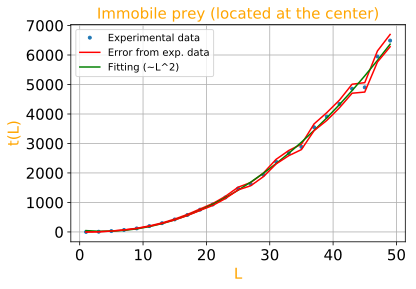

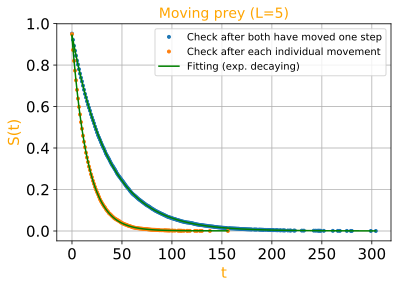

In [13]:
# Plot everything.

plt.figure(1)
plt.title('Immobile prey (located at the center)', fontsize=15, color='orange')
plt.xlabel('L', fontsize=15, color='orange')
plt.ylabel('t(L)', fontsize=15, color='orange')
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.grid(True)
plt.plot(Lvec, mvecIm, ".", Lvec, mvecIm+evecIm, "-r", Lvec, mvecImFit, "g", Lvec, mvecIm-evecIm, "-r")
plt.legend(('Experimental data', 'Error from exp. data', 'Fitting (~L^2)'))


plt.figure(2)
plt.title('Moving prey (L=5)', fontsize=14, color='orange')
plt.xlabel('t', fontsize=15, color='orange')
plt.ylabel('S(t)', fontsize=15, color='orange')
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.grid(True)
plt.plot(tvec1, S1, ".", tvec2, S2, ".", tvec1, S1Fit, "g", tvec2, S2Fit, "g")
plt.legend(('Check after both have moved one step', 'Check after each individual movement', 'Fitting (exp. decaying)'))

## Interpreting the results

### Immobile prey

When there is an immobile prey located at the center, the time that a predator takes to capture the prey is proportional to L^2, that is to say, proportional to the area of the lattice.

### Moving prey

For the case of the moving prey, the survival probability S(t) takes the form of an exponentially decaying function with respect to time t.

If checking after both have moved one step, the survival probability is qualitatively higher in all domain, perhaps due to the fact that some captures are neglected if a predator moves to the site of a prey (or vice versa) but the prey (or the predator) still has to move before checking.

This fact is considered in the function stepsMoving2, whose results lead to a faster decay in the aforementioned exponential function, as one can see in the previous plots.